# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://learn.wbscodingschool.com/courses/data-science/lessons/%f0%9f%93%9d-5-data-quality/) and use what you've learnt to see how reliable the data is.

In [139]:
import pandas as pd

Load our cleaned DataFrames

In [142]:
# orders_cl.csv
path = './Files/orders_cl.csv'
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
path = './Files/orderlines_cl.csv'
orderlines_cl = pd.read_csv(path)

# products_cl.csv
path = './Files/products_cl.csv'
products_cl = pd.read_csv(path)

# brands.csv
path = './Files/brands.csv'
brands = pd.read_csv(path)

# orders_cl.csv
path = './Files/cleaned_orders_cl.csv'
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
path = './Files/cleaned_orderlines_cl.csv'
orderlines_cl = pd.read_csv(path)


## 1.&nbsp; Define Pandas display format

In [145]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)# your code here

In [147]:
orders_cl.shape[0]

61775

In [149]:
orderlines_cl.shape[0]

205580

## 2.&nbsp; Exclude unwanted orders

In [152]:
# Keep only the desired order states
valid_orders = orders_cl[orders_cl["state"].isin(["Completed", "Cancelled","Pending"])]
print(orders_cl["state"].unique())


['Cancelled' 'Completed' 'Pending']


In [154]:
valid_orders.shape[0]

61775

In [156]:
valid_orderlines = orderlines_cl[orderlines_cl["id_order"].isin(valid_orders["order_id"])]
print(valid_orderlines.info())


<class 'pandas.core.frame.DataFrame'>
Index: 76653 entries, 6 to 205568
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                76653 non-null  int64  
 1   id_order          76653 non-null  int64  
 2   product_id        76653 non-null  int64  
 3   product_quantity  76653 non-null  int64  
 4   sku               76653 non-null  object 
 5   unit_price        76653 non-null  float64
 6   date              76653 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ MB
None


In [158]:
valid_orderlines.shape[0]

76653

In [160]:
valid_orders = valid_orders[valid_orders["order_id"].isin(valid_orderlines["id_order"])]
print(valid_orders.info())


<class 'pandas.core.frame.DataFrame'>
Index: 59672 entries, 0 to 61774
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      59672 non-null  int64  
 1   created_date  59672 non-null  object 
 2   total_paid    59672 non-null  float64
 3   state         59672 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB
None


In [162]:
valid_orders.shape[0]

59672

In [164]:
valid_orderlines.shape[0]

76653

In [166]:
# Step 5: Save the cleaned DataFrames back to CSV
valid_orderlines.to_csv('./Files/cleaned_orderlines_cl.csv', index=False)
valid_orders.to_csv('./Files/cleaned_orders_cl.csv', index=False)

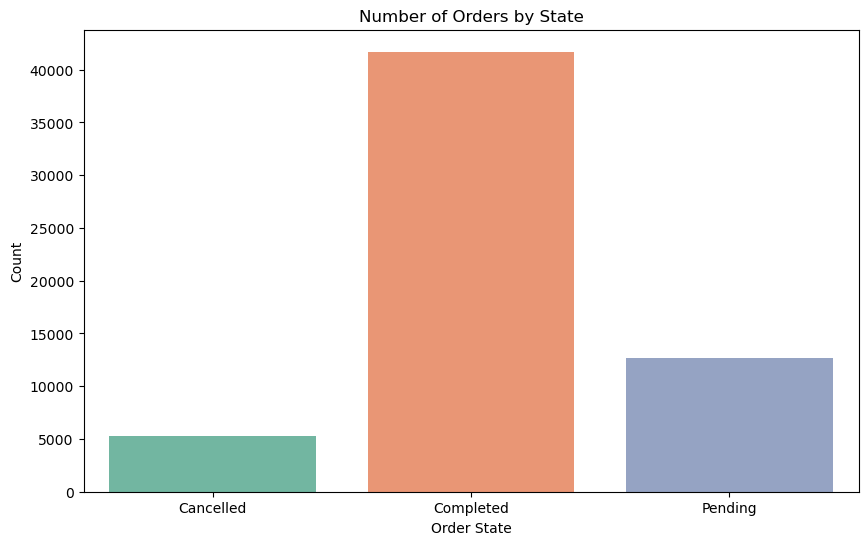

In [169]:
#Number of Orders by State
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x="state", data=valid_orders, hue="state",palette="Set2",legend=False)
plt.title("Number of Orders by State")
plt.xlabel("Order State")
plt.ylabel("Count")
plt.show()


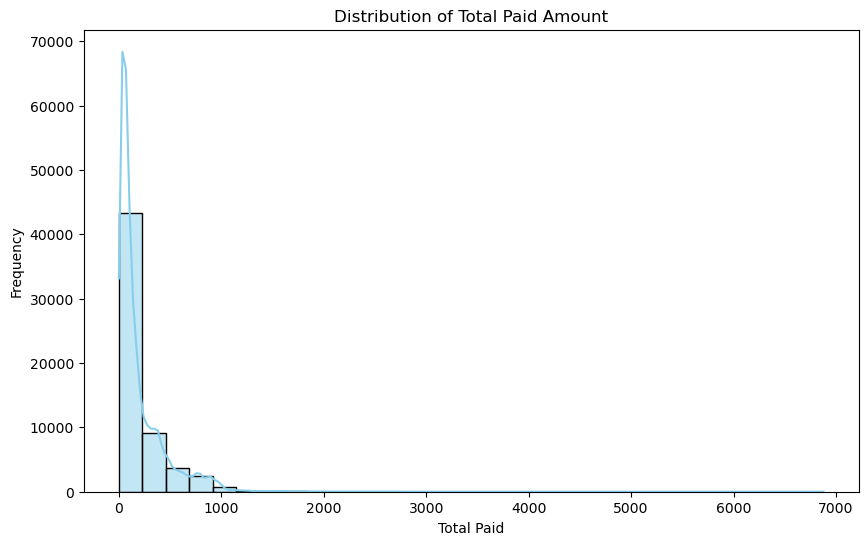

In [171]:
#Distribution of Total Paid Amount
plt.figure(figsize=(10, 6))
sns.histplot(valid_orders["total_paid"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Total Paid Amount")
plt.xlabel("Total Paid")
plt.ylabel("Frequency")
plt.show()



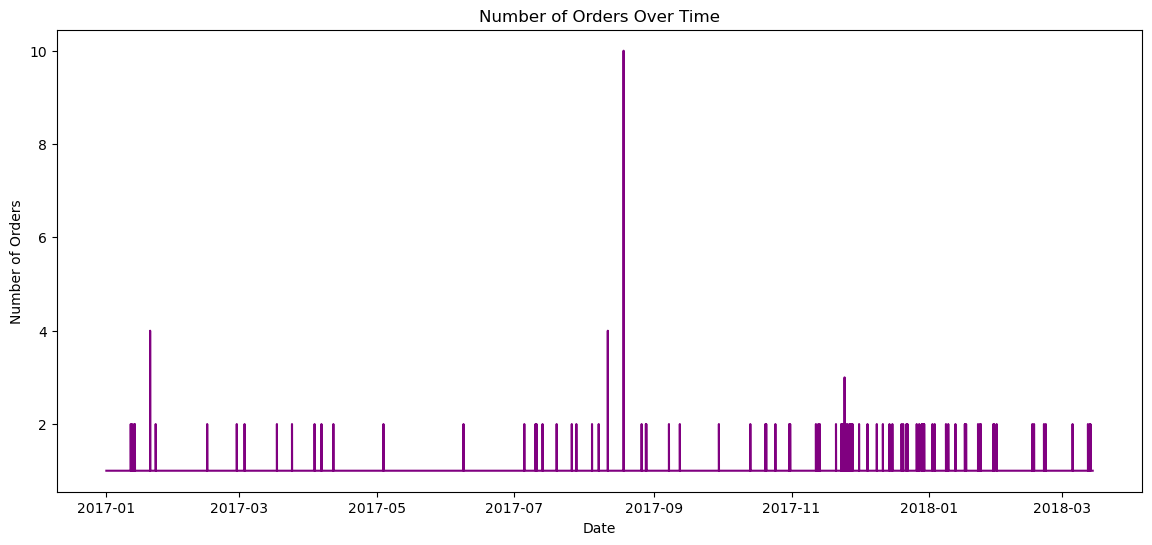

In [173]:
#Orders Over Time
valid_orders["created_date"] = pd.to_datetime(valid_orders["created_date"])

plt.figure(figsize=(14, 6))
sns.lineplot(x="created_date", y="order_id", data=valid_orders.groupby("created_date").count().reset_index(), color="purple")
plt.title("Number of Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()


## 3.&nbsp; Exclude orders with unknown products


In [177]:
#1. Identify Unknown Products 
#Check which SKUs are present in products
valid_skus = products_cl["sku"].unique()

# Filter unknown SKUs in orderlines
unknown_products = orderlines_cl[~orderlines_cl["sku"].isin(valid_skus)]
print("Unknown Products Found:")
print(unknown_products["sku"].unique())


Unknown Products Found:
[]


In [118]:
#2. Find Affected Orders
# Get the list of affected order IDs
orders_with_unknown_products = unknown_products["id_order"].unique()
print("Orders to be Deleted:")
print(orders_with_unknown_products)


Orders to be Deleted:
[299576 299638 299695 ... 527170 527191 527367]


In [120]:
#3. Remove Affected Orderlines
# Remove rows from orderlines with unknown products
valid_orderlines = orderlines_cl[~orderlines_cl["id_order"].isin(orders_with_unknown_products)]
print("Valid Orderlines After Removal:")
print(valid_orderlines.info())


Valid Orderlines After Removal:
<class 'pandas.core.frame.DataFrame'>
Index: 205580 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                205580 non-null  int64  
 1   id_order          205580 non-null  int64  
 2   product_id        205580 non-null  int64  
 3   product_quantity  205580 non-null  int64  
 4   sku               205580 non-null  object 
 5   unit_price        205580 non-null  float64
 6   date              205580 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 12.5+ MB
None


In [89]:
#4. Remove Affected Orders
# Remove orders with unknown products from valid_orders
valid_orders = valid_orders[~valid_orders["order_id"].isin(orders_with_unknown_products)]
print("Valid Orders After Removal:")
print(valid_orders.info())


Valid Orders After Removal:
<class 'pandas.core.frame.DataFrame'>
Index: 220585 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      220585 non-null  int64  
 1   created_date  220585 non-null  object 
 2   total_paid    220585 non-null  float64
 3   state         220585 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.4+ MB
None


In [87]:
# Check if there are any orders with unknown products
print("Orders with Unknown Products:", orders_with_unknown_products)

# Count valid orders before and after removal
valid_orders_before = orders_cl.shape[0]  # Before removal
valid_orders_after = valid_orders.shape[0]
# Calculate removed orders and the percentage
removed_orders = valid_orders_before - valid_orders_after
print(f"Removed Orders: {removed_orders} ({removed_orders / valid_orders_before * 100:.2f}%)")


Orders with Unknown Products: [299576 299638 299695 ... 527170 527191 527367]
Removed Orders: 6319 (2.78%)


In [75]:
# Step 1: Filter out the unknown product SKUs from orderlines
unknown_products = orderlines_cl[~orderlines_cl["sku"].isin(products_cl["sku"])]
orders_with_unknown_products = unknown_products["id_order"].unique()

# Step 2: Remove affected orderlines from orderlines_cl
valid_orderlines = orderlines_cl[~orderlines_cl["id_order"].isin(orders_with_unknown_products)]

# Step 3: Remove affected orders from valid_orders (assuming orders_cl has the order data)
valid_orders = orders_cl[~orders_cl["order_id"].isin(orders_with_unknown_products)]

# Step 4: Verify the number of rows after removal
print(f"Valid Orderlines After Removal: {valid_orderlines.shape[0]}")
print(f"Valid Orders After Removal: {valid_orders.shape[0]}")

# Step 5: Save the cleaned DataFrames back to CSV
valid_orderlines.to_csv('./Files/cleaned_orderlines_cl.csv', index=False)
valid_orders.to_csv('./Files/cleaned_orders_cl.csv', index=False)

# Optional: Save products_cl (if you've made any changes to it)
products_cl.to_csv('./Files/cleaned_products_cl.csv', index=False)

# Confirm that the files are saved
print("Cleaned files have been saved successfully.")


Valid Orderlines After Removal: 205580
Valid Orders After Removal: 220585
Cleaned files have been saved successfully.


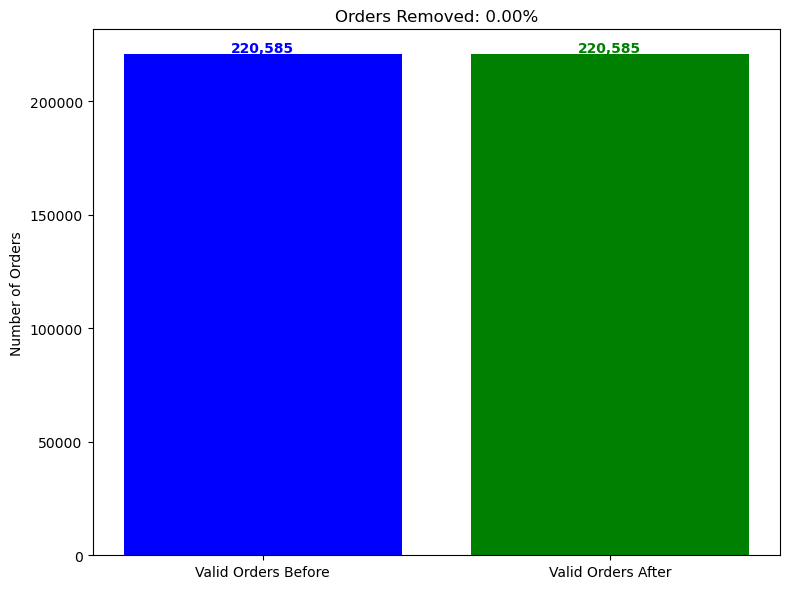

In [79]:
import matplotlib.pyplot as plt

# Step 1: Filter out affected orders (with unknown products) from valid_orders
valid_orders_after = valid_orders[~valid_orders["order_id"].isin(orders_with_unknown_products)]

# Step 2: Count the number of valid orders before and after removal
valid_orders_before = len(valid_orders)  # Before removal
valid_orders_after_count = len(valid_orders_after)  # After removal

# Step 3: Calculate the percentage of removed orders
removed_orders = valid_orders_before - valid_orders_after_count
percentage_removed = (removed_orders / valid_orders_before) * 100

# Step 4: Data for the bar chart
labels = ['Valid Orders Before', 'Valid Orders After']
values = [valid_orders_before, valid_orders_after_count]

# Step 5: Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Number of Orders')
plt.title(f'Orders Removed: {percentage_removed:.2f}%')
plt.text(0, valid_orders_before + 1000, f'{valid_orders_before:,}', ha='center', color='blue', fontweight='bold')
plt.text(1, valid_orders_after_count + 1000, f'{valid_orders_after_count:,}', ha='center', color='green', fontweight='bold')

# Step 6: Display the plot
plt.tight_layout()
plt.show()


## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [ ]:
# your code here

#### Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [ ]:
# your code here

### What is the average difference between `total_paid` and `unit_price_total`?

In [ ]:
# your code here

### What is the distribution of these differences?

In [ ]:
# your code here

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [ ]:
# your explanation here

### If there are differences that you can’t explain: what should you do with these orders?

In [ ]:
# your code here

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

In [ ]:
# your thoughts & code here

Do not forget to download your quality controlled DataFrames

In [ ]:
from google.colab import files

#orders_quality_controlled.to_csv("orders_qu.csv", index=False)
#files.download("orders_qu.csv")

#orderlines_quality_controlled.to_csv("orderlines_qu.csv", index=False)
#files.download("orderlines_qu.csv")